In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [5]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


# What are the top ten games with the highest ratings?

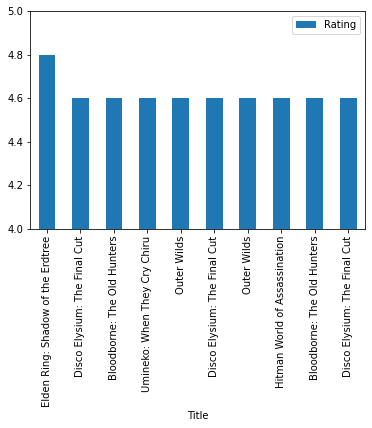

In [4]:
import matplotlib.pyplot as plt
data = df
data = data[["Title", "Genres", "Rating"]]
# Columns needed: Title, Genres, Plays.
data = data.sort_values(by=['Rating'], ascending=False).head(10)
# data.head(10)
ax = data.plot(x='Title', y='Rating', kind='bar')
ax.set_ylim(4, 5)
plt.show()

# Homework 8/9/23
- Come up with question and solution.
- Start thinking about how to handle string data.
    - What to do with k's (for example "5k").
    - Possible solution: turn the k's in the strings to 000, then turn the string into an integer.
    - Better solution: get rid of the k's, and then multiply the number by 1000.

# Which company created the most games?


In [35]:
data = df
team_games = data['Team'].value_counts()
most_games = team_games.idxmax()
number_of_games = team_games.max()
print("The company with the most amount of games is", most_games, "with", number_of_games, "games!")

The company with the most amount of games is ['Capcom'] with 35 games!


# Which game has the most plays?

In [6]:
def convert_to_int(entry):
    entry = entry.lower() 
    if 'k' in entry:
        return int(float(entry.replace('k', '')) * 1000)
    else:
        return int(float(entry))
df['new_plays'] = df['Plays'].apply(convert_to_int)
data = df.sort_values(by = ['new_plays'], ascending = False)
data = data[['Title', 'new_plays']]
game_title = data.iloc[0]['Title']
game_plays = data.iloc[0]['new_plays']
print('The game with the most points is', game_title, 'with', game_plays, 'plays!')

The game with the most points is Minecraft with 33000 plays!


# What is the ratio between plays and the number of reviews?

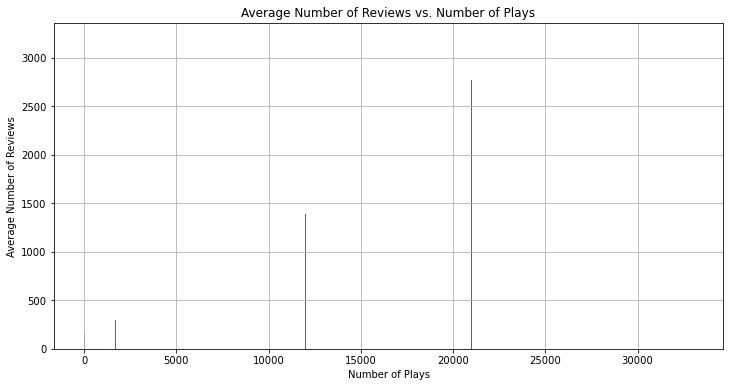

In [11]:
data = df

def convert_to_int(entry):
    entry = entry.lower() 
    if 'k' in entry:
        return int(float(entry.replace('k', '')) * 1000)
    else:
        return int(float(entry))
data['new_plays'] = data['Plays'].apply(convert_to_int)
data['reviews'] = data['Number of Reviews'].apply(convert_to_int)

grouped_data = data.groupby('new_plays')['reviews'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(grouped_data['new_plays'], grouped_data['reviews'])
plt.title('Average Number of Reviews vs. Number of Plays')
plt.xlabel('Number of Plays')
plt.ylabel('Average Number of Reviews')
plt.grid(True)
plt.show()

# Homework 8/15/23
 - Come up with one more question and solution (use a graph).
 - Do an entire data science project.
     - Find a dataset, make 2-3 questions and answers.